In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
X_train, X_test, y_train, y_test = load('../../preprocesiranje/classification_data.joblib')

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from termcolor import colored

In [4]:
def model_info(y_real, y_pred):
    # mere kvaliteta
    print(classification_report(y_real, y_pred))
    
    # matrica konfuzije
    y_true = np.array(y_real)
    y_pred = np.array(y_pred)

    # kreiranje matrice konfuzije
    conf_matrix = confusion_matrix(y_true, y_pred)

    # kreiranje heatmap-e za matricu konfuzije
    plt.figure(figsize = (3, 3))
    class_names = [-1, 0, 1]
    sns.heatmap(conf_matrix, annot = True, cmap = 'Greens', fmt = 'd', cbar = True, xticklabels = class_names, yticklabels = class_names)
    plt.xlabel('Predict values')
    plt.ylabel('Real values')
    plt.title('Confusion matrix')
    plt.show()

In [5]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    return model, y_train_pred, y_test_pred

# Stablo odlučivanja

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [7]:
dtc = DecisionTreeClassifier(random_state =19)
dtc_model, y_train_pred_dtc, y_test_pred_dtc = build_model(dtc, X_train, X_test, y_train, y_test)

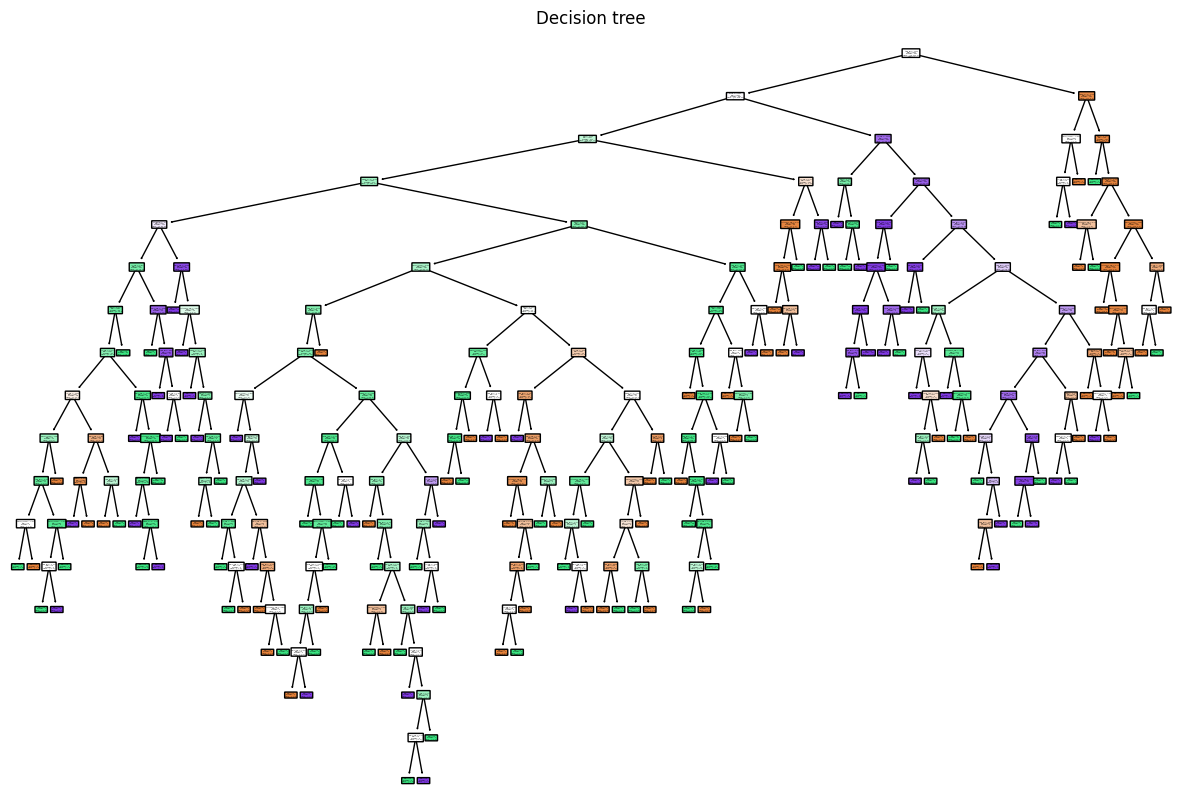

Broj čvorova: 289, dubina: 17


In [8]:
# vizualizacija stabla odlučivanja
plt.figure(figsize=(15, 10))
plot_tree(dtc_model, feature_names = X_train.columns, class_names = ['-1', '0', '1'], filled = True, rounded = True)
plt.title("Decision tree")
plt.show()

# informacije o broju čvorova i dubini
num_nodes = dtc_model.tree_.node_count
depth = dtc_model.tree_.max_depth
print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

age               0.124833
gender            0.021456
occupation        0.091418
time_bp           0.051731
time_dp           0.206248
travel_time       0.016857
easeof_online     0.046040
home_env          0.084396
like_hw           0.171273
dislike_hw        0.058916
prefer            0.108219
certaindays_hw    0.018612
dtype: float64


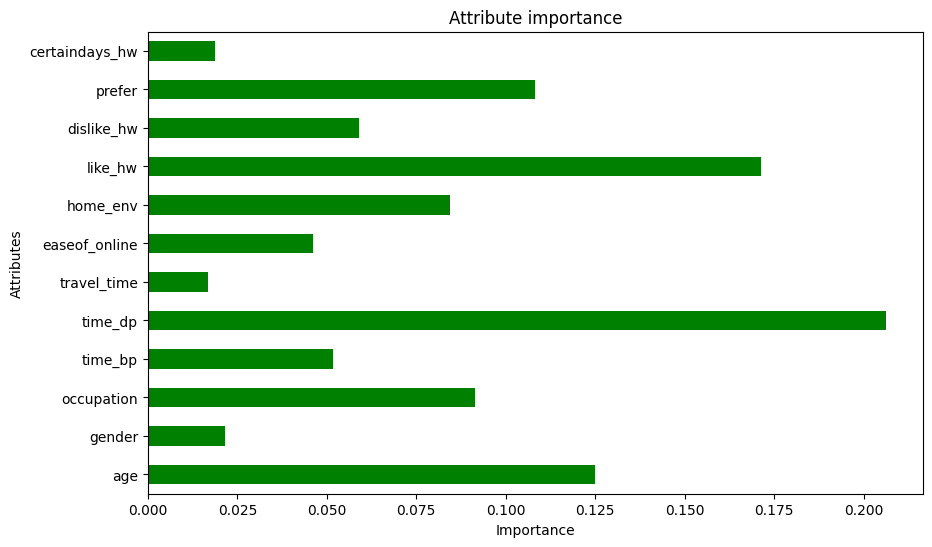

In [9]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(dtc_model.feature_importances_, index = X_train.columns)
print(feature_importance)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       268
           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       338

    accuracy                           1.00       940
   macro avg       1.00      1.00      1.00       940
weighted avg       1.00      1.00      1.00       940



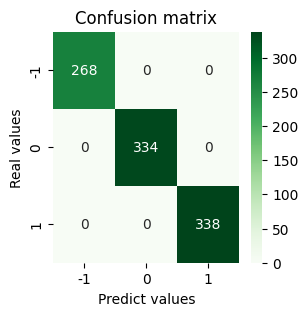


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.81      0.88      0.84        58
           0       0.80      0.83      0.82        94
           1       0.87      0.78      0.82        83

    accuracy                           0.83       235
   macro avg       0.83      0.83      0.83       235
weighted avg       0.83      0.83      0.83       235



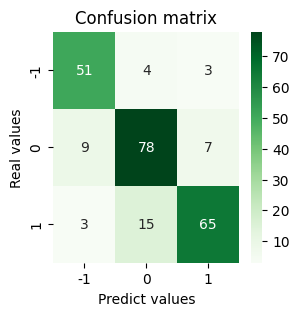

In [10]:
print('Train data:\n')
model_info(y_train, y_train_pred_dtc)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_dtc)

Na osnovu analize rezultata možemo zaključiti da je model odlučivanja veoma dobro istreniran na trening skupu, gde su sve metrike bile savršene. Međutim, na test skupu, primećujemo da model dosta greši, posebno u klasifikaciji instance klase 0 i 1. Ovakvi rezultati ukazuju na to da se naš model preprilagodio trening podacima.

### Podešavanje hiper-parametara modela

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [7, 9, 11, 13, 15],
    'min_samples_leaf': [3, 4, 5, 6],
    'class_weight': [None, 'balanced']
}

In [13]:
estimator_dtc = GridSearchCV(DecisionTreeClassifier(random_state = 19), param_grid = params, scoring = 'accuracy')

In [14]:
estimator_dtc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=19),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11, 13, 15],
                         'min_samples_leaf': [3, 4, 5, 6]},
             scoring='accuracy')

In [15]:
estimator_dtc.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 3}

In [16]:
estimator_dtc.best_score_

0.8425531914893618

In [17]:
best_model_dtc, y_train_pred_dtccv, y_test_pred_dtccv = build_model(estimator_dtc.best_estimator_, X_train, X_test, y_train, y_test)

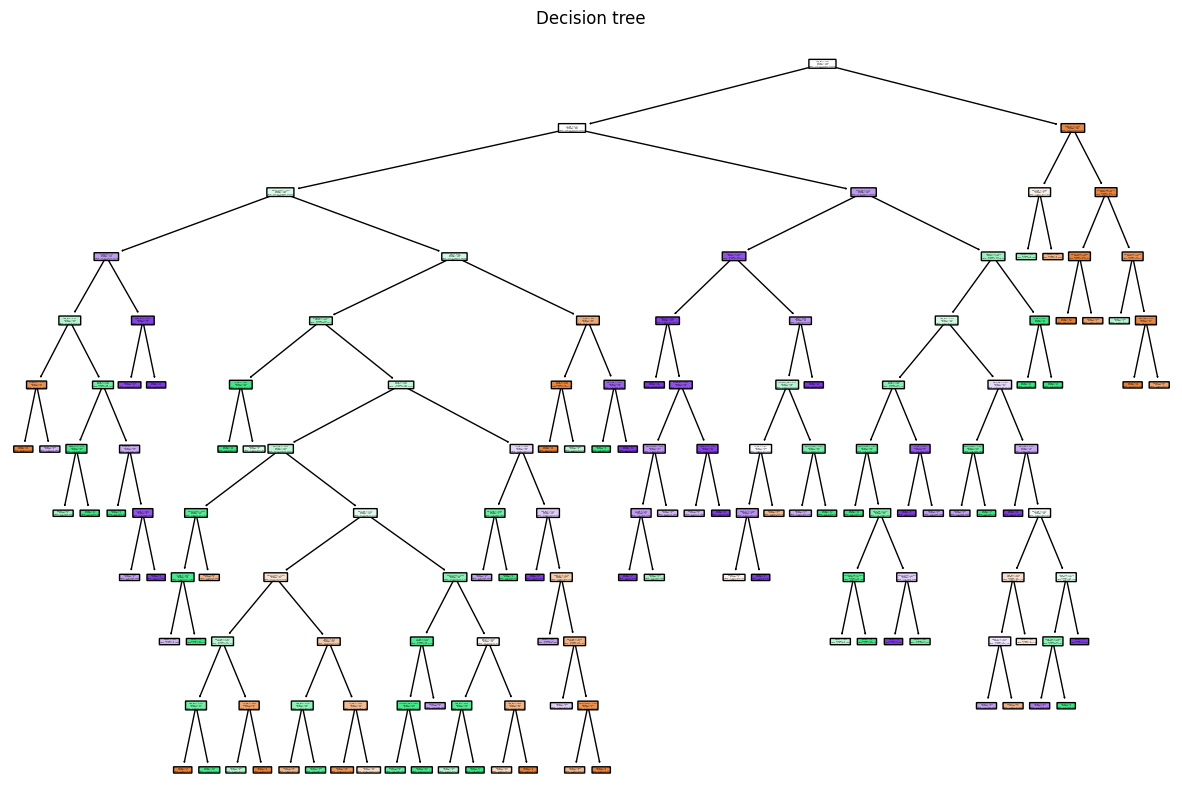

Broj čvorova: 153, dubina: 11


In [18]:
# vizualizacija stabla odlučivanja
plt.figure(figsize=(15, 10))
plot_tree(best_model_dtc, feature_names = X_train.columns, class_names = ['-1', '0', '1'], filled = True, rounded = True)
plt.title("Decision tree")
plt.show()

# informacije o broju čvorova i dubini
num_nodes = best_model_dtc.tree_.node_count
depth = best_model_dtc.tree_.max_depth
print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

age               0.075380
gender            0.012131
occupation        0.088963
time_bp           0.047130
time_dp           0.206957
travel_time       0.007121
easeof_online     0.120677
home_env          0.062161
like_hw           0.191311
dislike_hw        0.135062
prefer            0.040125
certaindays_hw    0.012982
dtype: float64


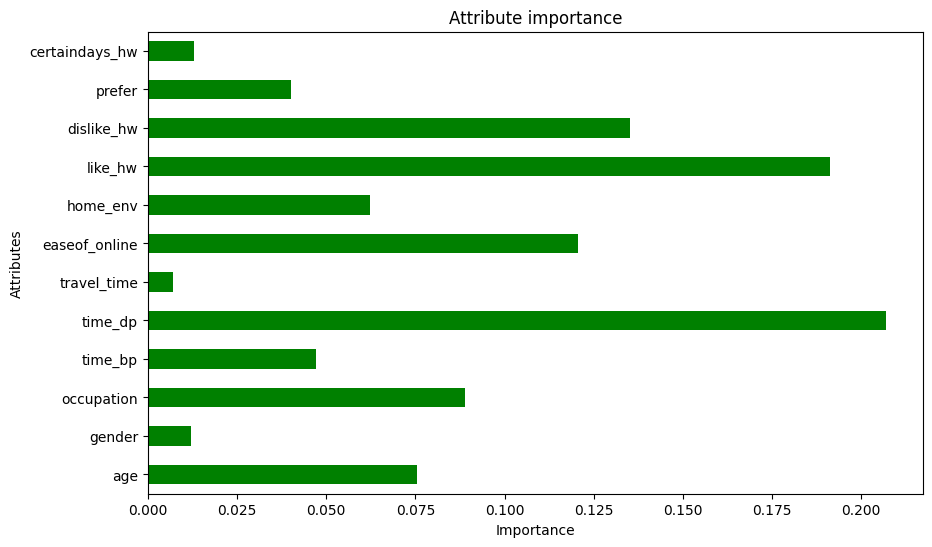

In [19]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(best_model_dtc.feature_importances_, index = X_train.columns)
print(feature_importance)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       0.87      0.95      0.91       268
           0       0.95      0.87      0.91       334
           1       0.95      0.95      0.95       338

    accuracy                           0.92       940
   macro avg       0.92      0.92      0.92       940
weighted avg       0.92      0.92      0.92       940



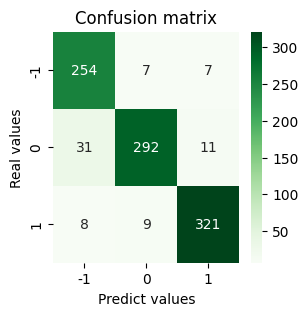


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.72      0.91      0.80        58
           0       0.89      0.78      0.83        94
           1       0.89      0.84      0.86        83

    accuracy                           0.83       235
   macro avg       0.83      0.84      0.83       235
weighted avg       0.85      0.83      0.84       235



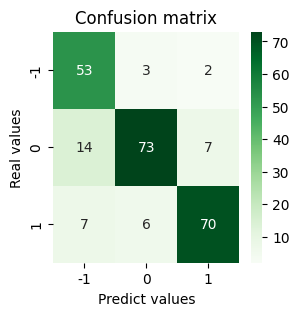

In [20]:
print('Train data:\n')
model_info(y_train, y_train_pred_dtccv)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_dtccv)

Preciznost, odziv i F1-ocene su visoke za svaku klasu, što ukazuje na to da je model sposoban da (donekle) kvalitetno klasifikuje instance na skupu za obuku.Međutim, kada je model testiran na neviđenim podacima (test skup), performanse su nešto niže. S obzirom na razlike u performansama između skupa za obuku i test skupa i ovaj model pokazuje blagu tendenciju za preprilagođavanje.

# Slučajne šume

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(random_state = 23)
rf_model, y_train_pred_rf, y_test_pred_rf = build_model(rf, X_train, X_test, y_train, y_test)

age               0.075380
gender            0.012131
occupation        0.088963
time_bp           0.047130
time_dp           0.206957
travel_time       0.007121
easeof_online     0.120677
home_env          0.062161
like_hw           0.191311
dislike_hw        0.135062
prefer            0.040125
certaindays_hw    0.012982
dtype: float64


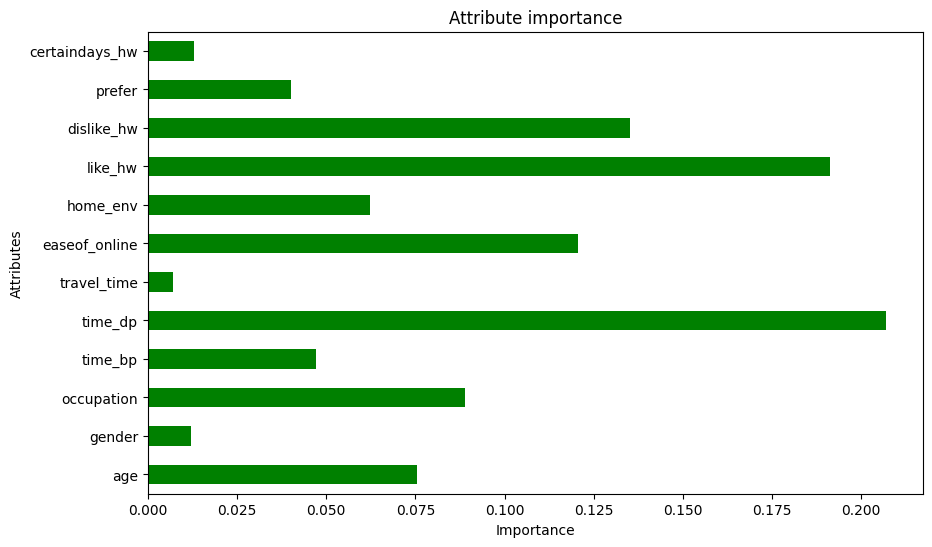

In [23]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(best_model_dtc.feature_importances_, index = X_train.columns)
print(feature_importance)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       268
           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       338

    accuracy                           1.00       940
   macro avg       1.00      1.00      1.00       940
weighted avg       1.00      1.00      1.00       940



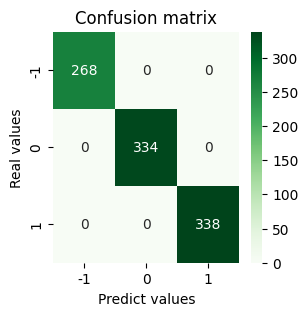


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.85      0.88      0.86        58
           0       0.83      0.87      0.85        94
           1       0.92      0.84      0.88        83

    accuracy                           0.86       235
   macro avg       0.87      0.87      0.86       235
weighted avg       0.87      0.86      0.86       235



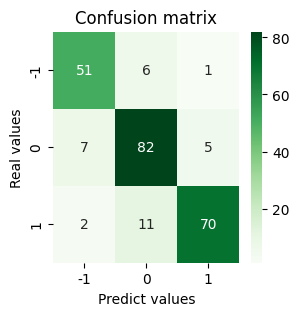

In [24]:
print('Train data:\n')
model_info(y_train, y_train_pred_rf)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_rf)

Ovaj model je takođe sklon preprilagođavanju. Na skupu za trening, model postiže savršene rezultate (100% preciznost, odziv i F1-ocjene) za sve tri klase (-1, 0, 1), što ukazuje na to da je model naučio podatke iz skupa za obuku do najmanjeg detalja. Ovo je uobičajen znak preprilagođavanja. Kada je model testiran na test podacima, primećujemo blagi pad u performansama, iako su i dalje solidne.

### Podešavanje hiper-parametara modela

In [25]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300],
}

In [26]:
estimator_rf = GridSearchCV(RandomForestClassifier(random_state = 19), param_grid = params)

In [27]:
estimator_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=19),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 200, 300]})

In [28]:
estimator_rf.best_params_

{'criterion': 'gini', 'n_estimators': 300}

In [29]:
estimator_rf.best_score_

0.8553191489361703

In [30]:
best_model_rf, y_train_pred_rfcv, y_test_pred_rfcv = build_model(estimator_rf.best_estimator_, X_train, X_test, y_train, y_test)

age               0.110319
gender            0.028292
occupation        0.061222
time_bp           0.069767
time_dp           0.157274
travel_time       0.041722
easeof_online     0.081917
home_env          0.072715
like_hw           0.126135
dislike_hw        0.138185
prefer            0.065517
certaindays_hw    0.046935
dtype: float64


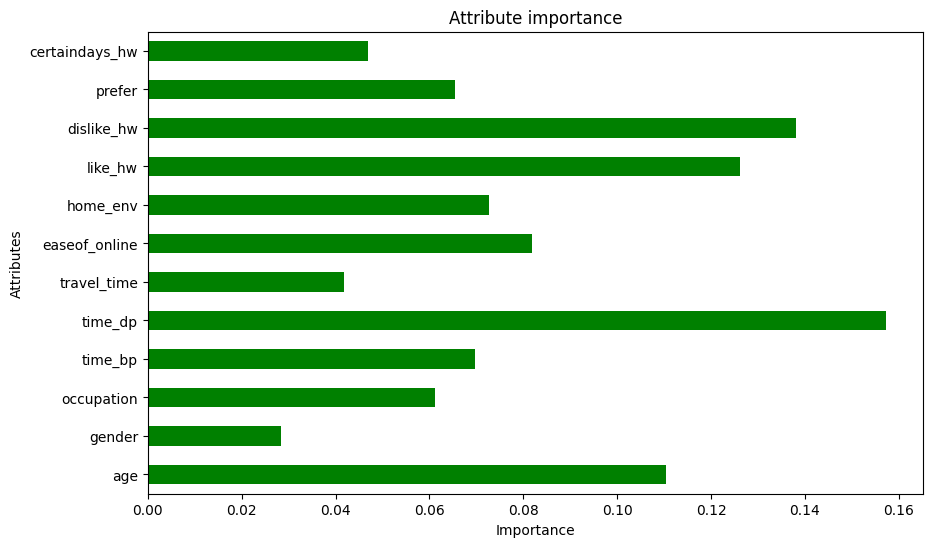

In [31]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(best_model_rf.feature_importances_, index = X_train.columns)
print(feature_importance)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       268
           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       338

    accuracy                           1.00       940
   macro avg       1.00      1.00      1.00       940
weighted avg       1.00      1.00      1.00       940



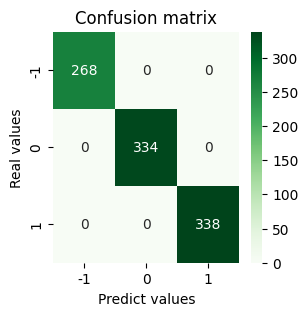


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.84      0.91      0.88        58
           0       0.84      0.86      0.85        94
           1       0.92      0.84      0.88        83

    accuracy                           0.87       235
   macro avg       0.87      0.87      0.87       235
weighted avg       0.87      0.87      0.87       235



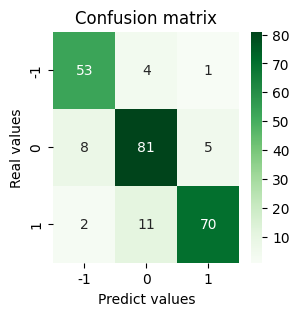

In [32]:
print('Train data:\n')
model_info(y_train, y_train_pred_rfcv)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_rfcv)

Ovaj model nije doneo nikakva poboljšanja u odnosu na prethodnin model.

# Poređenje modela

### ROC kriva 

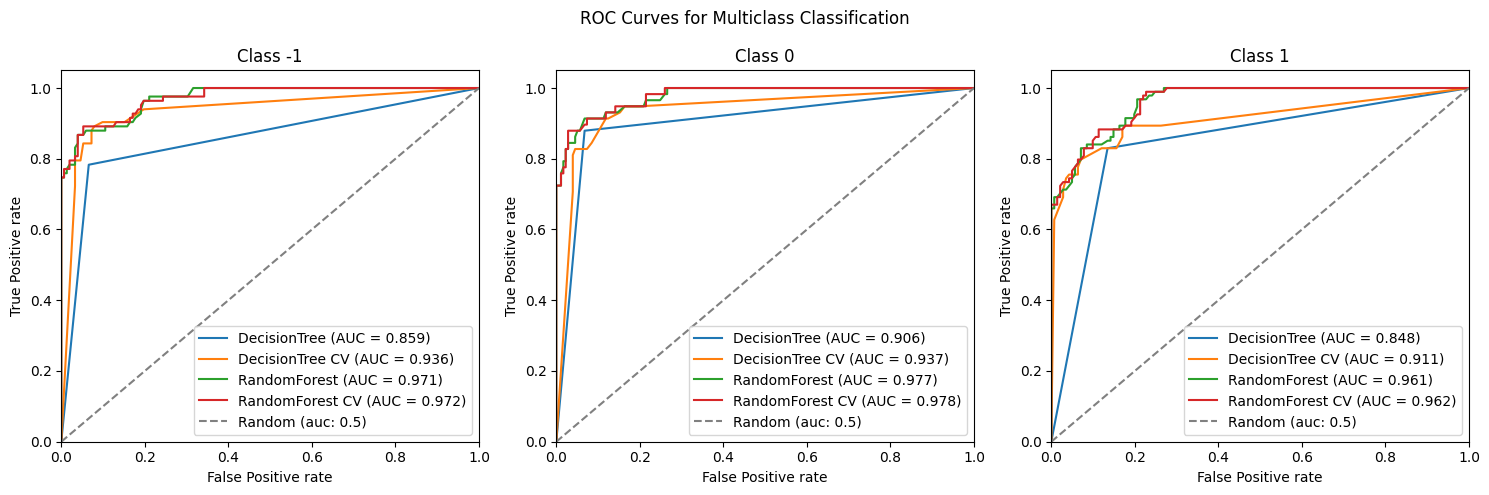

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# binarizacija ciljnih vrednosti (zbog višeklasne klasifikacije)
y_train_bin = label_binarize(y_train, classes=[-1, 0, 1])
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])

# definisanje modela i imena modela
models = [dtc_model, best_model_dtc, rf_model, best_model_rf]
model_names = ['DecisionTree', 'DecisionTree CV', 'RandomForest', 'RandomForest CV']

# inicijalizacija grafa
plt.figure(figsize = (15, 5))

# petlja za svaku klasu
for class_index in range(y_train_bin.shape[1]):
    # prikazivanje svake klase u odvojenom subplotu
    plt.subplot(1, y_train_bin.shape[1], class_index + 1)  
    plt.title(f'Class {class_index - 1}')
    
    # petlja za svaki model
    for model, model_name in zip(models, model_names):
        # izračunavanje vrednosti za ROC krivu i AUC
        y_pred = model.predict_proba(X_test) # Probabilities for positive class
   
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index-1],  y_pred[:, class_index-1])
        roc_auc = auc(fpr, tpr)

        # prikazivanje ROC krive za svaki model
        plt.plot(fpr, tpr, label = f'{model_name} (AUC = {roc_auc:.3f})')
        
    plt.plot([0, 1], [0, 1], label = 'Random (auc: 0.5)', color = 'grey', linestyle='--')
    
    # podešavanje osa za svaki subplot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend()

plt.suptitle('ROC Curves for Multiclass Classification')
plt.tight_layout()
plt.show()

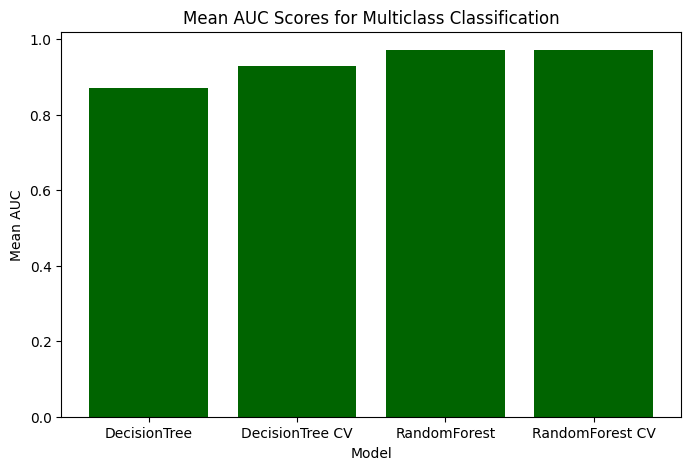

In [34]:
# izračunavanje usrednjenih AUC vrednosti za svaki model
mean_auc_scores = []

for model in models:
    y_pred = model.predict_proba(X_test)
    
    auc_scores = []
    for class_index in range(y_train_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index-1], y_pred[:, class_index-1])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
    
    mean_auc_scores.append(np.mean(auc_scores))

# vizualizacija usrednjene AUC vrednosti
plt.figure(figsize = (8, 5))
plt.bar(model_names, mean_auc_scores, color = 'darkgreen')
plt.xlabel('Model')
plt.ylabel('Mean AUC')
plt.title('Mean AUC Scores for Multiclass Classification')
plt.show()

### Vizualizacija klasifikacije

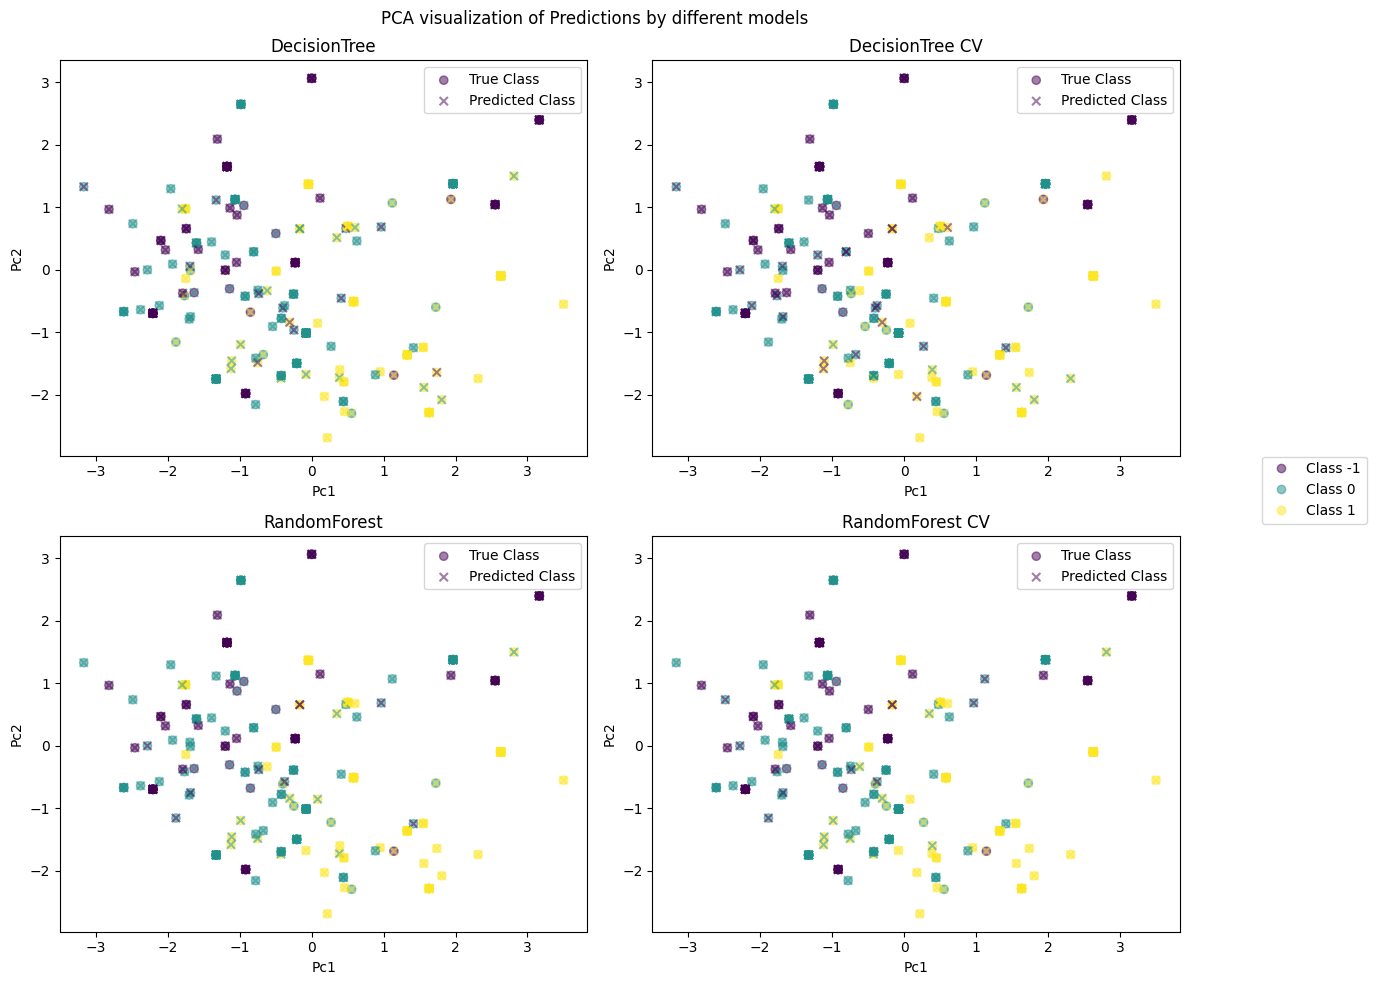

In [35]:
from sklearn.decomposition import PCA

num_dimensions = 2
class_name = y_test.unique()
y_preds = [y_test_pred_dtc, y_test_pred_dtccv, y_test_pred_rf, y_test_pred_rfcv]

# PCA modela
pca = PCA(n_components = num_dimensions)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
           
# raspoređivanje podataka u subplotovima
num_rows = 2
num_cols = 2         
fig, axes = plt.subplots(num_rows, num_cols, figsize = (12, 10))
for row in range(num_rows):
    for col in range(num_cols):
        model_idx = row * num_cols + col
        if model_idx < len(models):
            ax = axes[row, col]
            y_pred = y_preds[row * num_cols + col]
            model_name = model_names[model_idx]
            
            sc1 = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, marker = 'o', label = f'True Class', alpha=0.5)
            sc2 = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_pred, marker = 'x', label = f'Predicted Class', alpha=0.5)
            
            ax.set_title(f'{model_name}')
            ax.set_xlabel('Pc1')
            ax.set_ylabel('Pc2')
            ax.legend()
            
            
# dodavanje legendi na celu figuru
cmap = plt.cm.viridis
color_list = [cmap(i) for i in range(len(np.unique(y_test)))]
fig.legend(handles = sc1.legend_elements()[0], labels = [f'Class {class_idx}' for class_idx in ['-1', '0', '1']], 
           bbox_to_anchor = (1.05, 0.5), loc = 'center left')

plt.suptitle('PCA visualization of Predictions by different models')
plt.tight_layout()
plt.show()

# Čuvanje modela

In [36]:
from joblib import dump

In [37]:
dump(models, 'trees.joblib')

['trees.joblib']